### Importing the Required Libraries & Dataset

In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
data=pd.read_csv("IMDB-Movie-Data.csv")

### Display the Top 3 Rows of the Dataset

In [165]:
data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


### Display the last 3 Rows of the Dataset

In [166]:
data.tail(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### Finding the Shape of the Dataset[No. of the Rows & Columns]

In [167]:
print("The Total No. of the Rows:",data.shape[0])
print("The Total No. of the Columns:",data.shape[1])

The Total No. of the Rows: 1000
The Total No. of the Columns: 12


### Getting all the Info of the Dataset

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### Getting the Overall Statistics of the Dataset

In [169]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Description of the Dataset
The Metascore for movies typically ranges from 0 to 100, with higher scores indicating generally favorable reviews and lower scores indicating less favorable reviews. 

### Checking & Handling the Missing Values

In [170]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

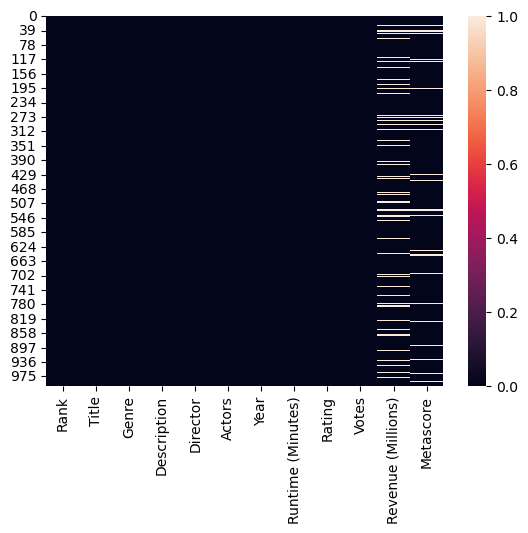

In [171]:
sns.heatmap(data.isnull())

In [172]:
data=data.interpolate(limit_direction='both')

<Axes: >

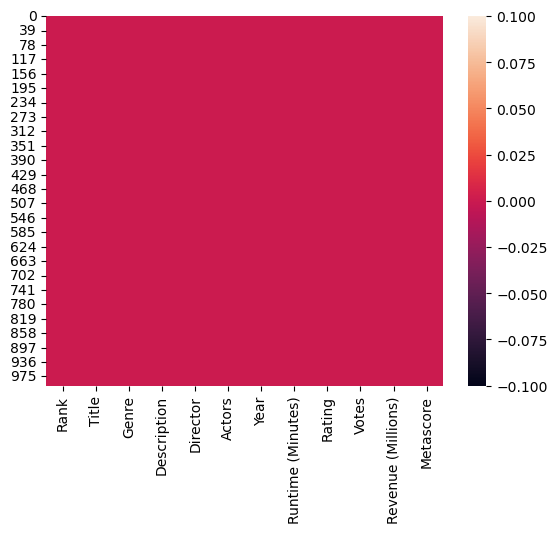

In [173]:
sns.heatmap(data.isnull())

### Checking & Handling the Duplicates

In [174]:
print("Are there Any Duplicates?...",data.duplicated().any())

Are there Any Duplicates?... False


### Display the Titles of the Movie having Runtime>=180

In [175]:
titles=data[data["Runtime (Minutes)"]>=180]

<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

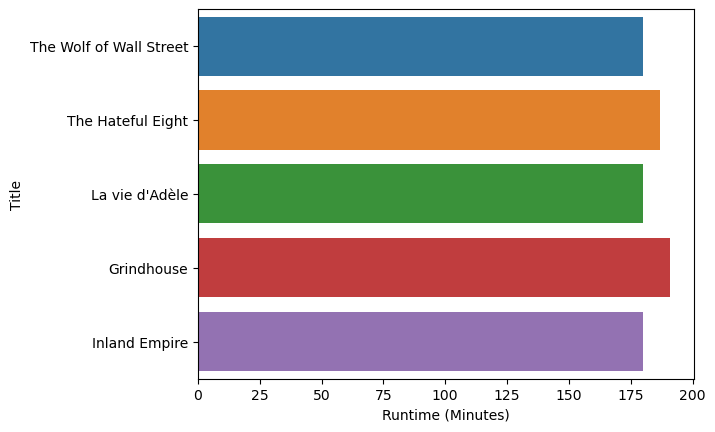

In [176]:
sns.barplot(y="Title",x="Runtime (Minutes)",data=titles)

### In which year,there was the highest Average Voting

In [177]:
data.groupby("Year")["Votes"].mean().sort_values(ascending=False).head()

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
Name: Votes, dtype: float64

<Axes: xlabel='Year', ylabel='Votes'>

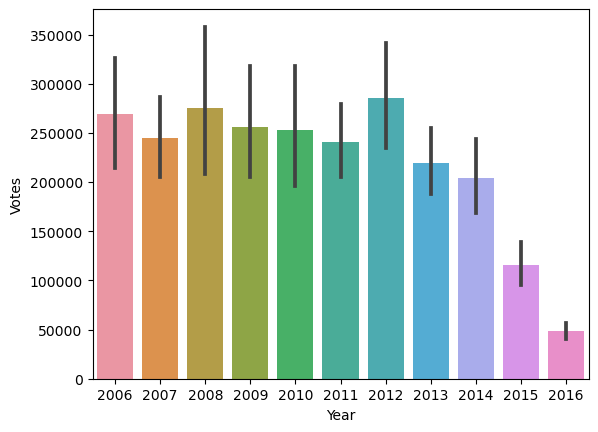

In [178]:
sns.barplot(x="Year",y="Votes",data=data)

### In which year,there was the highest Average Revenue

In [179]:
data.groupby("Year")["Revenue (Millions)"].mean().sort_values(ascending=False).head()

Year
2009    109.224902
2012    107.973281
2010    105.138333
2008     97.902885
2011     88.015317
Name: Revenue (Millions), dtype: float64

<Axes: xlabel='Year', ylabel='Revenue (Millions)'>

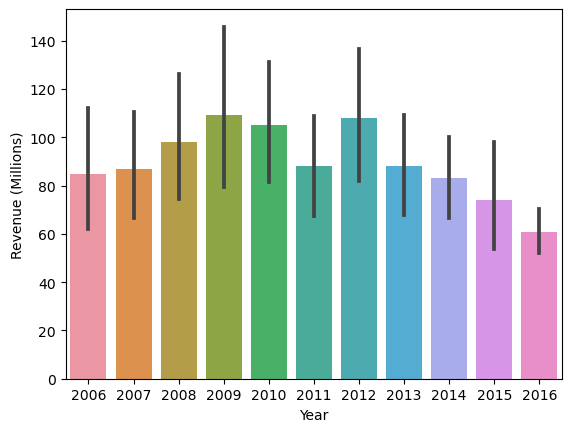

In [180]:
sns.barplot(x="Year",y="Revenue (Millions)",data=data)

### Find the Average Rating for the each Director

In [181]:
data.groupby("Director")["Rating"].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam Leon              6.50
Adam McKay             7.00
Adam Shankman          6.30
                       ... 
Xavier Dolan           7.55
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 644, dtype: float64

### Display the Titles of the top 10 Lengthy Movies 

In [182]:
top10=data.sort_values(by="Runtime (Minutes)",ascending=False).head(10)

<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

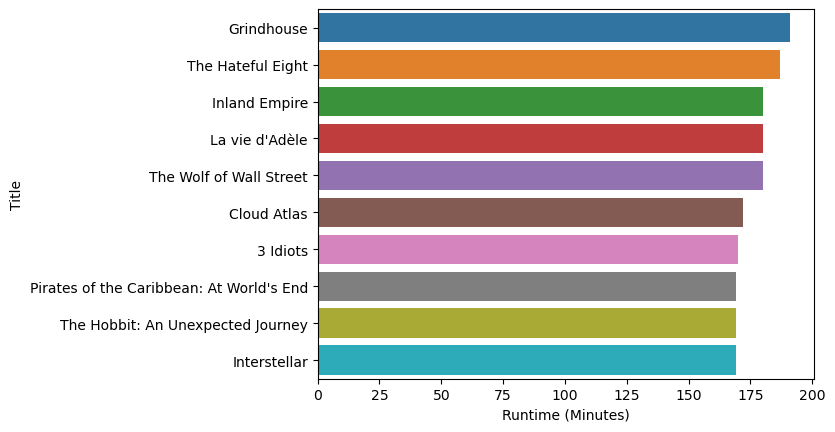

In [183]:
sns.barplot(x="Runtime (Minutes)",y="Title",data=top10)

### Display the No. of the Movies per Year

In [184]:
data["Year"].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

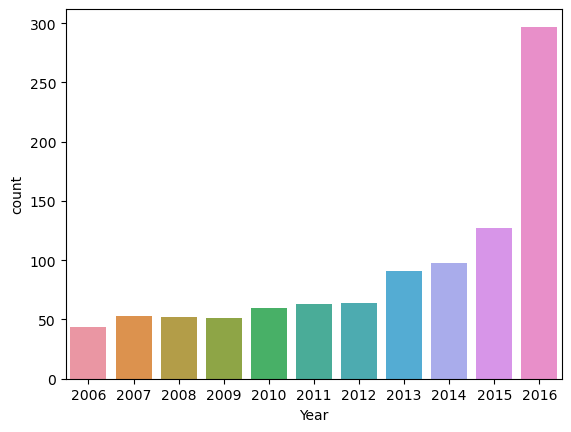

In [185]:
sns.countplot(x="Year",data=data)

### Find the Movie having the Highest Revenue

In [186]:
v1=data.sort_values(by="Revenue (Millions)",ascending=False).head()

<Axes: xlabel='Revenue (Millions)', ylabel='Title'>

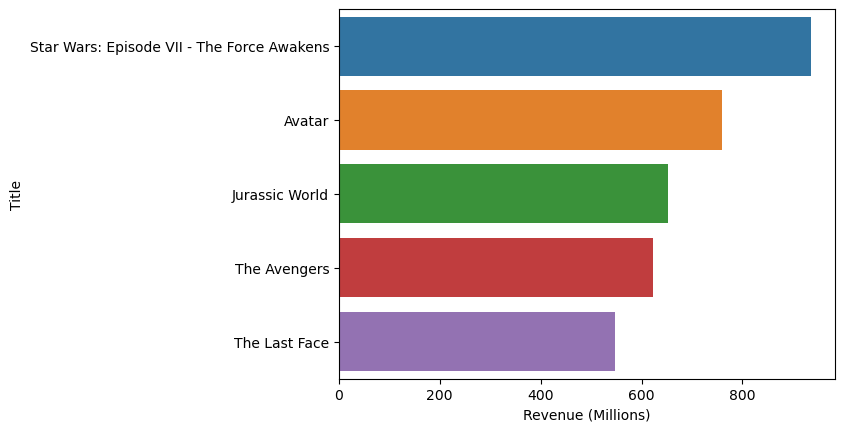

In [187]:
sns.barplot(x="Revenue (Millions)",y="Title",data=v1)

### Display the Titles & Directors of the top 10 High Rated Movies

In [188]:
v2=data.nlargest(10,"Rating")[["Title","Director","Rating"]].set_index("Title")
v2

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Dangal,Nitesh Tiwari,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5


<Axes: xlabel='Rating', ylabel='Title'>

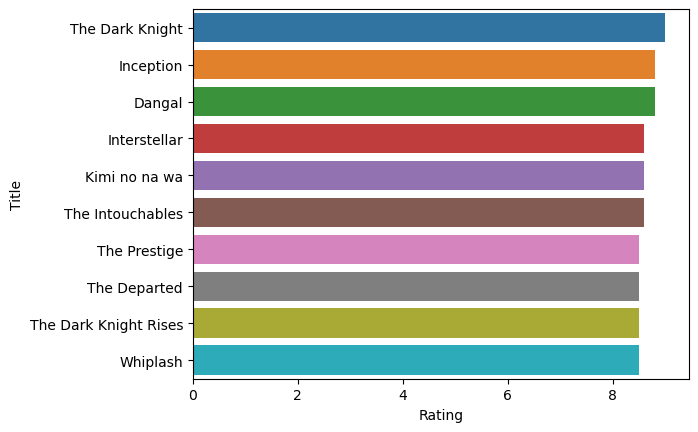

In [189]:
sns.barplot(x="Rating",y=v2.index,data=v2)

### Display the top 10 Movies having the highest Revenue

In [190]:
v3=data.sort_values(by="Revenue (Millions)",ascending=False).head(10)

<Axes: xlabel='Revenue (Millions)', ylabel='Title'>

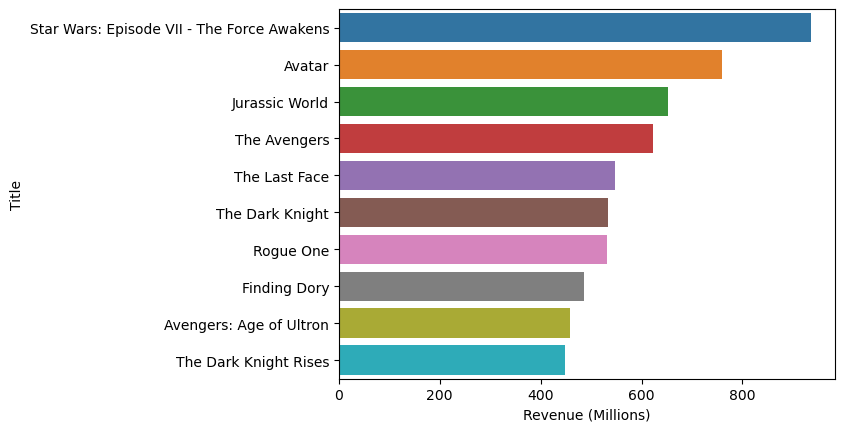

In [191]:
sns.barplot(x="Revenue (Millions)",y="Title",data=v3)

### Find the Average Rating of the Movies[Year Wise]

In [192]:
v4=data.groupby("Year")["Rating"].mean().sort_values(ascending=False)

### Does the Rating affect the Revenue

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

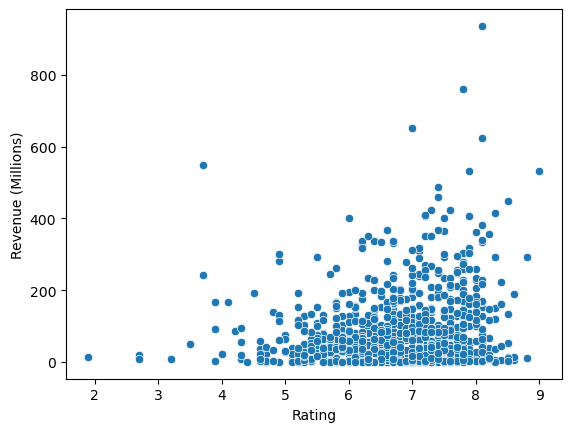

In [193]:
sns.scatterplot(x="Rating",y="Revenue (Millions)",data=data)

### Classify the Movies,based on Rating["Average","Good",Excellent]

In [194]:
def rating(r):
    if r>=7.0:
        return "Excellent"
    if r>=5.0:
        return "Good"
    else:
        return "Average"

In [195]:
v5=data["Rating"].apply(rating)
data.insert(9,"Rating_Category",v5)

In [196]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Rating_Category,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,Excellent,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,Excellent,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,Excellent,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,Excellent,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,Good,393727,325.02,40.0


### Count the No. of the Action Movies

In [197]:
len(data[data["Genre"].str.contains("Action",case=False)])

303

### Find all the Unique Values from the 'Genre' Column

In [198]:
data["Genre"]

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [199]:
list=[]
for value in data["Genre"]:
    list.append(value.split(","))
list    

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [200]:
one=[]
for item in list:
    for item1 in item:
        one.append(item1)
one       

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [201]:
unique=[]
for only in one:
    if only not in unique:
        unique.append(only)
unique        

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [203]:
len(unique)

20

### How many Films of each 'Genre' was made

In [215]:
from collections import Counter
Counter(one)

Counter({'Drama': 513,
         'Action': 303,
         'Comedy': 279,
         'Adventure': 259,
         'Thriller': 195,
         'Crime': 150,
         'Romance': 141,
         'Sci-Fi': 120,
         'Horror': 119,
         'Mystery': 106,
         'Fantasy': 101,
         'Biography': 81,
         'Family': 51,
         'Animation': 49,
         'History': 29,
         'Sport': 18,
         'Music': 16,
         'War': 13,
         'Western': 7,
         'Musical': 5})

### ---Alhamdulilah---